# **Assignments for "Simple Linear Regression"**
Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices
To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**1)** Investigate the data and do any necessary data cleaning.

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
house_prices_df.isnull().sum()/len(house_prices_df)


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [4]:
df_interpolated = house_prices_df.interpolate(method ='linear', limit_direction ='forward')

df_interpolated.isnull().sum()/len(df_interpolated)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.

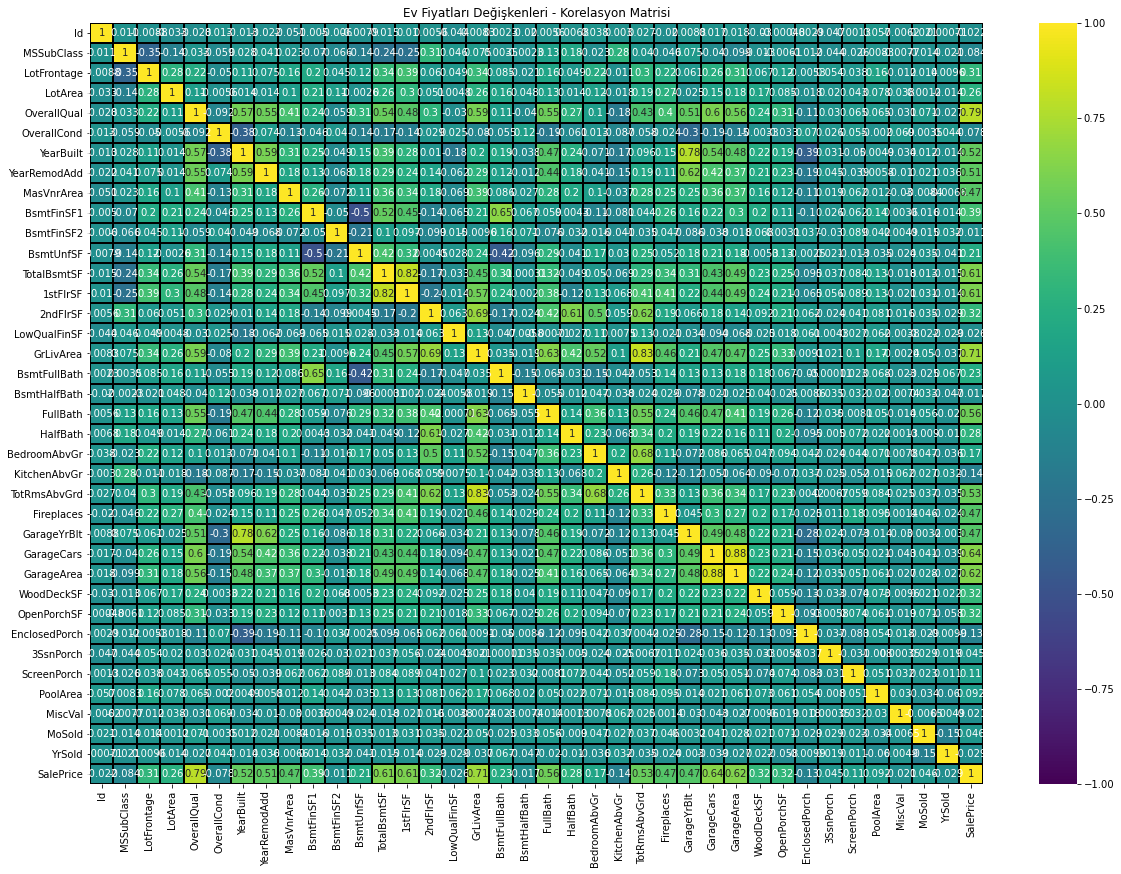

In [5]:
df_interpolated_corr = df_interpolated.corr()
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_interpolated_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "viridis", mask=None)

plt.title("Ev Fiyatları Değişkenleri - Korelasyon Matrisi")
plt.show()

In [6]:
df_new = df_interpolated.filter(['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','SalePrice'], axis=1)
df_new

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
5,5,796,796,1362,2,480,143000
6,8,1686,1694,1694,2,636,307000
7,7,1107,1107,2090,2,484,200000
8,7,952,1022,1774,2,468,129900
9,5,991,1077,1077,1,205,118000


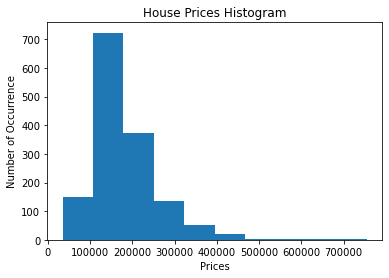

In [7]:
plt.hist(df_new.SalePrice)
plt.title("House Prices Histogram")
plt.xlabel("Prices")
plt.ylabel("Number of Occurrence")
plt.show()

In [8]:
print(df_new.GarageCars.min(),df_new.GarageCars.max())

0 4


In [9]:
def make_ordinal(GarageCars):
    if GarageCars == 0:
        return 0
    else: 
        return 1
    
df_new['HasGarage'] = df_new["GarageCars"].apply(make_ordinal)
df_new

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice,HasGarage
0,7,856,856,1710,2,548,208500,1
1,6,1262,1262,1262,2,460,181500,1
2,7,920,920,1786,2,608,223500,1
3,7,756,961,1717,3,642,140000,1
4,8,1145,1145,2198,3,836,250000,1
5,5,796,796,1362,2,480,143000,1
6,8,1686,1694,1694,2,636,307000,1
7,7,1107,1107,2090,2,484,200000,1
8,7,952,1022,1774,2,468,129900,1
9,5,991,1077,1077,1,205,118000,1


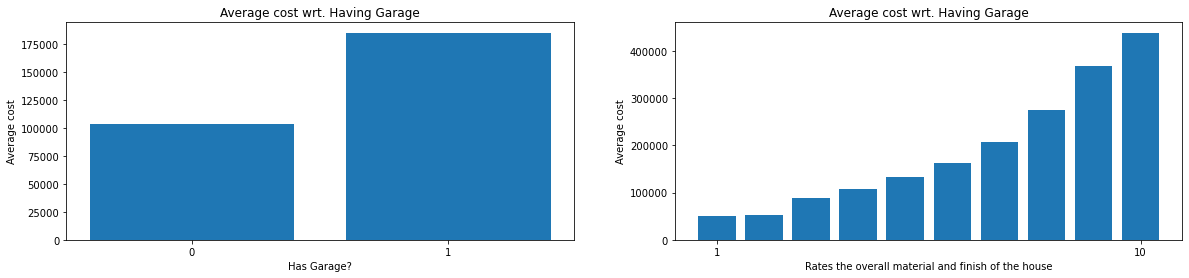

In [32]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.bar(df_new.groupby("HasGarage")["SalePrice"].mean().index, df_new.groupby("HasGarage")["SalePrice"].mean())
plt.title("Average cost wrt. Having Garage")
plt.ylabel("Average cost")
plt.xlabel("Has Garage?")
plt.xticks([0,1])

plt.subplot(1,2,2)
#sns.countplot(y='SalePrice',hue='HasGarage',data = df_new)
#plt.xticks([0,1])

plt.bar(df_new.groupby("OverallQual")["SalePrice"].mean().index, df_new.groupby("OverallQual")["SalePrice"].mean())
plt.title("Average cost wrt. Having Garage")
plt.ylabel("Average cost")
plt.xlabel("Rates the overall material and finish of the house")
plt.xticks([1,10])

plt.show()

**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   TotalBsmtSF  1460 non-null   int64
 2   1stFlrSF     1460 non-null   int64
 3   GrLivArea    1460 non-null   int64
 4   GarageCars   1460 non-null   int64
 5   GarageArea   1460 non-null   int64
 6   SalePrice    1460 non-null   int64
 7   HasGarage    1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [36]:
from sklearn import linear_model
# Y is the target variable
Y = df_new['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = df_new[['HasGarage','OverallQual']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [11032.95973256 44957.23896921]

Intercept: 
 -103708.02636437051


$$ charges = -103708.02 + 11032.95 HasGarage + 44957.23 OverallQual$$

In [38]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 03 May 2021   Prob (F-statistic):          2.16e-312
Time:                        14:40:37   Log-Likelihood:                -17825.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1457   BIC:                         3.567e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.037e+05   6956.102    -14.909      0.000   -1.17e+05   -9.01e+04
HasGarage    1.103e+04   5754.817      1.917      0.055    -255.652    2.23e+04
OverallQual  4.496e+04    952.864     47.181      0.000    4.31e+04    4.68e+04
==============================================================================
Omnibus:                      603.940   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6080.127
Skew:                           1.645   Prob(JB):                         0.00
Kurtosis:                      12.441   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: bağımsız değişkenlerin bağımlı değişkendeki varyansın 0.627 sini açıklar.